In [25]:
import pandas as pd 
import os 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from tqdm import tqdm

In [11]:
#Read COPD Gene spreadsheet and get an idea of cases versus controls versus unknowns (clean the spreadsheet)
copd = pd.read_excel("/fs5/p_masi/krishar1/COPDGENE/COPD-gene-progress.xlsx")
copd.head()

,Body Site,Case/control,Consent code,Consent,Downloaded,File format,File Name,Study PHS,GOLD classification,Image type,local_id,Population,Sex,Size,Unnamed: 14
0,chest,control,2,DS-CS,no,tar,COPDGene_R27796_COPDGene_R27796.tar,phs000179,0,CT,d1984536,African American,male,985333760,1944.0
1,chest,Control,2,DS-CS,no,tar,COPDGene_L26505.tar.gz,phs000179,GOLD_0_Control,CT,d1992782,Caucasian,male,679836847,1317.0
2,chest,control,2,DS-CS,no,tar,COPDGene_A65347_COPDGene_A65347.tar,phs000179,0,CT,d1984561,African American,female,1239736320,73.0
3,chest,case,2,DS-CS,no,tar,COPDGene_K93612_COPDGene_K93612.tar,phs000179,3,CT,d1984658,Caucasian,male,1131806720,NaN
4,chest,control,2,DS-CS,no,tar,COPDGene_Z48649_COPDGene_Z48649.tar,phs000179,0,CT,d1984559,African American,male,740085760,3045.0


In [12]:
#Observe the dataset
copd

,Body Site,Case/control,Consent code,Consent,Downloaded,File format,File Name,Study PHS,GOLD classification,Image type,local_id,Population,Sex,Size,Unnamed: 14
0,chest,control,2,DS-CS,no,tar,COPDGene_R27796_COPDGene_R27796.tar,phs000179,0,CT,d1984536,African American,male,985333760,1944.0
1,chest,Control,2,DS-CS,no,tar,COPDGene_L26505.tar.gz,phs000179,GOLD_0_Control,CT,d1992782,Caucasian,male,679836847,1317.0
2,chest,control,2,DS-CS,no,tar,COPDGene_A65347_COPDGene_A65347.tar,phs000179,0,CT,d1984561,African American,female,1239736320,73.0
3,chest,case,2,DS-CS,no,tar,COPDGene_K93612_COPDGene_K93612.tar,phs000179,3,CT,d1984658,Caucasian,male,1131806720,NaN
4,chest,control,2,DS-CS,no,tar,COPDGene_Z48649_COPDGene_Z48649.tar,phs000179,0,CT,d1984559,African American,male,740085760,3045.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12098,chest,control,1,HMB,no,tar,COPDGene_W67783_COPDGene_W67783.tar,phs000179,0,CT,d1984409,European-American,male,1200496640,NaN
12099,chest,Control,1,HMB,no,tar,COPDGene_Q19809.tar.gz,phs000179,GOLD_0_Control,CT,d1992305,Caucasian,female,529506641,1819.0
12100,chest,case,1,HMB,no,tar,COPDGene_D70993_COPDGene_D70993.tar,phs000179,3,CT,d1979500,Caucasian,male,1129728000,NaN
12101,chest,Other,1,HMB,no,tar,COPDGene_C63452.tar.gz,phs000179,GOLD_1,CT,d1992576,Caucasian,male,1300595977,NaN


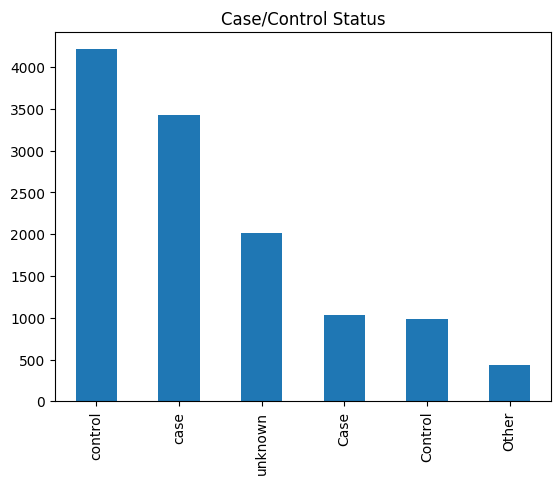

In [13]:
#Make a counpolot of Case/Control status.
copd['Case/control'].value_counts().plot(kind='bar')
plt.title('Case/Control Status')
plt.show()


In [14]:
copd.sort_values(by="File Name", inplace=True)
copd.reset_index(drop=True, inplace=True)
copd

,Body Site,Case/control,Consent code,Consent,Downloaded,File format,File Name,Study PHS,GOLD classification,Image type,local_id,Population,Sex,Size,Unnamed: 14
0,chest,Case,2,DS-CS,no,tar,COPDGene_A00282.tar.gz,phs000179,GOLD_3,CT,d1992781,Caucasian,female,535650641,NaN
1,chest,case,2,DS-CS,no,tar,COPDGene_A00282_COPDGene_A00282.tar,phs000179,3,CT,d1984662,Caucasian,female,1008240640,NaN
2,chest,Control,1,HMB,no,tar,COPDGene_A00444.tar.gz,phs000179,GOLD_0_Control,CT,d1990538,African,male,620153587,NaN
3,chest,control,1,HMB,no,tar,COPDGene_A00444_COPDGene_A00444.tar,phs000179,0,CT,d1975802,African American,male,1237340160,1.0
4,chest,control,1,HMB,no,tar,COPDGene_A00975_COPDGene_A00975.tar,phs000179,0,CT,d1975803,African American,male,1664419840,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12098,chest,Other,1,HMB,no,tar,COPDGene_Z99224.tar.gz,phs000179,GOLD_1,CT,d1992750,Caucasian,female,746121423,NaN
12099,chest,unknown,1,HMB,no,tar,COPDGene_Z99224_COPDGene_Z99224.tar,phs000179,1,CT,d1984177,Caucasian,female,1168793600,NaN
12100,chest,Control,1,HMB,no,tar,COPDGene_Z99278.tar.gz,phs000179,GOLD_0_Control,CT,d1992440,Caucasian,female,525661161,3117.0
12101,chest,control,1,HMB,no,tar,COPDGene_Z99278_COPDGene_Z99278.tar,phs000179,0,CT,d1982826,Caucasian,female,990300160,3116.0


In [15]:
#Get 3000 random rows from the dataframe 
copd = copd.sample(n=300, random_state=1)
copd

,Body Site,Case/control,Consent code,Consent,Downloaded,File format,File Name,Study PHS,GOLD classification,Image type,local_id,Population,Sex,Size,Unnamed: 14
282,chest,Control,1,HMB,no,tar,COPDGene_A57742.tar.gz,phs000179,GOLD_0_Control,CT,d1992098,Caucasian,female,526879236,66.0
9685,chest,case,1,HMB,no,tar,COPDGene_V28885_COPDGene_V28885.tar,phs000179,3,CT,d1984242,European-American,male,1375385600,NaN
10093,chest,Control,1,HMB,no,tar,COPDGene_W03476.tar.gz,phs000179,GOLD_0_Control,CT,d1990814,African,female,1069665185,NaN
6203,chest,case,1,HMB,no,tar,COPDGene_N44793_COPDGene_N44793.tar,phs000179,3,CT,d1979663,Caucasian,male,1634304000,NaN
7865,chest,control,1,HMB,no,tar,COPDGene_R76765_COPDGene_R76765.tar,phs000179,0,CT,d1982436,Caucasian,female,1597839360,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7958,chest,unknown,1,HMB,no,tar,COPDGene_R97274_COPDGene_R97274.tar,phs000179,1,CT,d1983822,Caucasian,male,1118044160,NaN
946,chest,case,1,HMB,no,tar,COPDGene_B87500_COPDGene_B87500.tar,phs000179,2,CT,d1978854,Caucasian,female,866560000,NaN
5443,chest,control,1,HMB,no,tar,COPDGene_L94893_COPDGene_L94893.tar,phs000179,0,CT,d1976222,African American,male,976568320,1398.0
4124,chest,Control,1,HMB,no,tar,COPDGene_J15259.tar.gz,phs000179,GOLD_0_Control,CT,d1991871,Caucasian,male,560160676,1047.0


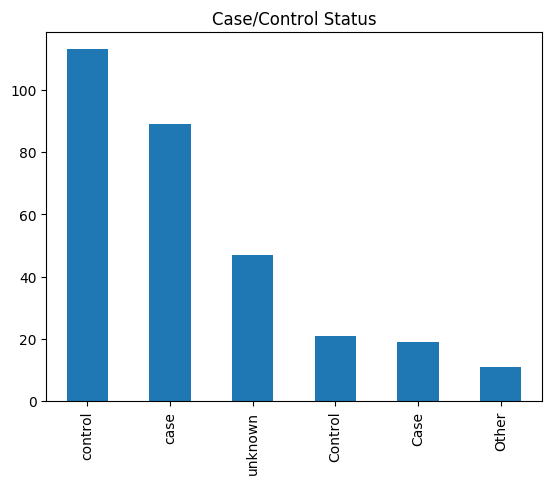

In [16]:
copd['Case/control'].value_counts().plot(kind='bar')
plt.title('Case/Control Status')
plt.show()

In [17]:
files = os.listdir("/fs5/p_masi/krishar1/COPDGENE/new")
files

['COPDGene_C61537_COPDGene_C61537.tar',
 'COPDGene_M21843_COPDGene_M21843.tar',
 'COPDGene_N39021.tar.gz',
 'COPDGene_G76891_COPDGene_G76891.tar',
 'COPDGene_B42465.tar.gz',
 'COPDGene_B92822_COPDGene_B92822.tar',
 'COPDGene_M05916_COPDGene_M05916.tar',
 'COPDGene_P84677_COPDGene_P84677.tar',
 'COPDGene_G10225_COPDGene_G10225.tar',
 'COPDGene_M44510_COPDGene_M44510.tar',
 'COPDGene_M79347_COPDGene_M79347.tar',
 'COPDGene_B39301_COPDGene_B39301.tar',
 'COPDGene_B76040.tar.gz',
 'COPDGene_F76581_COPDGene_F76581.tar',
 'COPDGene_G70855_COPDGene_G70855.tar',
 'COPDGene_H68798_COPDGene_H68798.tar',
 'COPDGene_J27783_COPDGene_J27783.tar',
 'COPDGene_F89158.tar.gz',
 'COPDGene_J48313_COPDGene_J48313.tar',
 'COPDGene_N39384_COPDGene_N39384.tar',
 'COPDGene_P04287_COPDGene_P04287.tar',
 'COPDGene_F22043_COPDGene_F22043.tar',
 'COPDGene_P65714.tar.gz',
 'COPDGene_G65614_COPDGene_G65614.tar',
 'COPDGene_B72141_COPDGene_B72141.tar',
 'COPDGene_F24087_COPDGene_F24087.tar',
 'COPDGene_C64519_COPDGen

In [18]:
#check if the files in the directory are in the dataframe. if they exists, change the Downloaded status to Yes
for file in files:
    if file in copd['File Name'].values:
        copd.loc[copd['File Name'] == file, 'Downloaded'] = 'Yes'

copd


,Body Site,Case/control,Consent code,Consent,Downloaded,File format,File Name,Study PHS,GOLD classification,Image type,local_id,Population,Sex,Size,Unnamed: 14
282,chest,Control,1,HMB,Yes,tar,COPDGene_A57742.tar.gz,phs000179,GOLD_0_Control,CT,d1992098,Caucasian,female,526879236,66.0
9685,chest,case,1,HMB,no,tar,COPDGene_V28885_COPDGene_V28885.tar,phs000179,3,CT,d1984242,European-American,male,1375385600,NaN
10093,chest,Control,1,HMB,no,tar,COPDGene_W03476.tar.gz,phs000179,GOLD_0_Control,CT,d1990814,African,female,1069665185,NaN
6203,chest,case,1,HMB,Yes,tar,COPDGene_N44793_COPDGene_N44793.tar,phs000179,3,CT,d1979663,Caucasian,male,1634304000,NaN
7865,chest,control,1,HMB,no,tar,COPDGene_R76765_COPDGene_R76765.tar,phs000179,0,CT,d1982436,Caucasian,female,1597839360,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7958,chest,unknown,1,HMB,no,tar,COPDGene_R97274_COPDGene_R97274.tar,phs000179,1,CT,d1983822,Caucasian,male,1118044160,NaN
946,chest,case,1,HMB,Yes,tar,COPDGene_B87500_COPDGene_B87500.tar,phs000179,2,CT,d1978854,Caucasian,female,866560000,NaN
5443,chest,control,1,HMB,Yes,tar,COPDGene_L94893_COPDGene_L94893.tar,phs000179,0,CT,d1976222,African American,male,976568320,1398.0
4124,chest,Control,1,HMB,Yes,tar,COPDGene_J15259.tar.gz,phs000179,GOLD_0_Control,CT,d1991871,Caucasian,male,560160676,1047.0


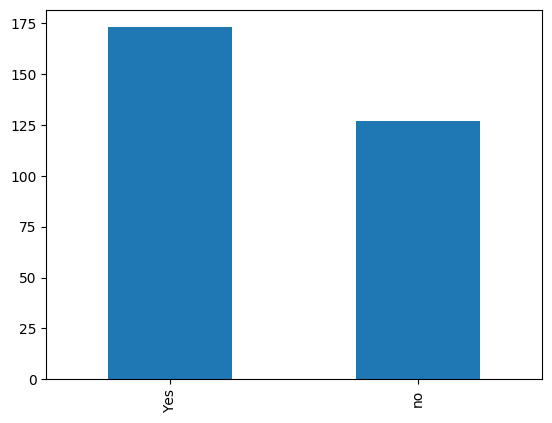

In [19]:
#Count the numvbber of files that have been downloaded
copd['Downloaded'].value_counts().plot(kind='bar')

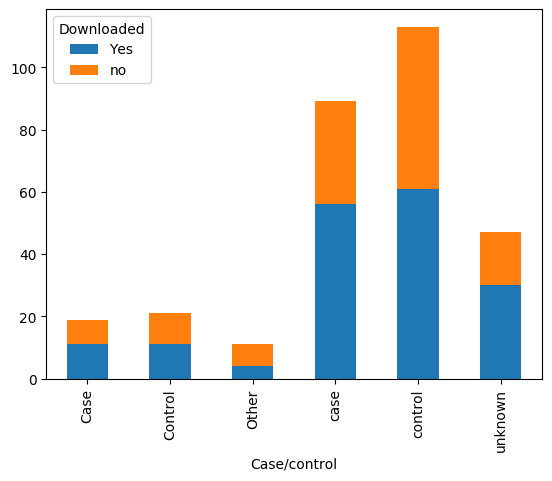

In [20]:
#Count the number of cases and controls that have been downloaded
copd.groupby(['Case/control', 'Downloaded']).size().unstack().plot(kind='bar', stacked=True)

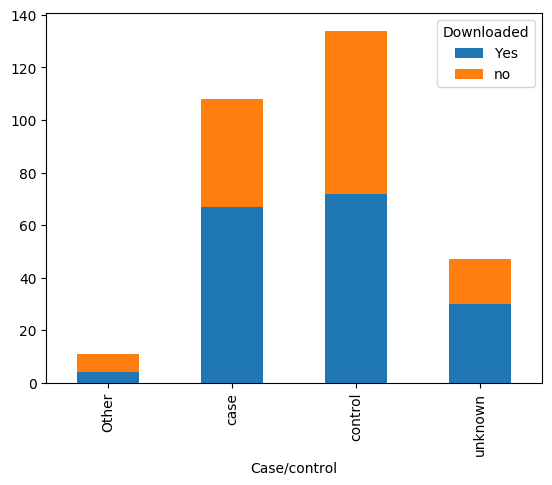

In [21]:
#Replace Case with case and replace Control with control
copd['Case/control'] = copd['Case/control'].str.replace('Case', 'case')
copd['Case/control'] = copd['Case/control'].str.replace('Control', 'control')
copd.groupby(['Case/control', 'Downloaded']).size().unstack().plot(kind='bar', stacked=True)

In [22]:
copd.to_csv("/fs5/p_masi/krishar1/COPDGENE/COPD-gene-progress_updated.csv", index=False)

In [24]:
## Gather information about the reconstruction kernels from the files that been archived 
dicoms = "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/dcm2nii/DICOM"
archived_files = os.listdir(dicoms)

In [ ]:
from pydicom import dcmread
uid = {}
patientid = {}
for file in tqdm(archived_files):
    #listd the files in the subdirectory and read the first dicom file 
    files = os.listdir(os.path.join(dicoms, file))
    dicom_file = dcmread(os.path.join(dicoms, file, files[0]))
    #Get the reconstruction kernel
    try:
        kernel = dicom_file.ReconstructionKernel
        seriesinstanceuid = dicom_file.SeriesInstanceUID
        uid[seriesinstanceuid] = kernel
    except:
        kernel = "Unknown"